# 🌾 **Proyecto de Análisis de Cultivos, Agrupación y Predicción**  
### 🌿 _Crop Analysis, Clustering and Prediction_, from Kaggle Datasets

---

## **📋 Información Básica:**

- **Nombre:** _Luis Rodrigo Barba Navarro_  
- **Matrícula:** _20490687_  
- **Correo electrónico:** _a20490687@itmexicali.edu.mx_

---

## **🏫 Institución Académica:**

- **Escuela:** _Tecnológico Nacional de México, Campus 'Mexicali'_  
- **Carrera:** _Ing. en Sistemas Computacionales_  
- **Curso:** _Inteligencia Artificial II_

---

## **📊 Descripción (Proyecto):**

Este proyecto se enfoca en el análisis de cultivos utilizando técnicas de agrupación (_clustering_) y predicción con datos obtenidos de [Kaggle](https://www.kaggle.com). 🌱 Se exploran diferentes características de los cultivos para identificar patrones en las condiciones del suelo que permitan mejorar la producción agrícola.

---



### **Importación de Librerías para Manipulación y Visualización de Datos**
En este bloque de código, estamos importando las librerías necesarias para la manipulación de datos, visualización, e interactividad dentro del entorno de Jupyter Notebook. 

In [86]:
# Importamos la librería NumPy, útil para trabajar con arreglos y operaciones matemáticas avanzadas.
import numpy as np

# Importamos la librería pandas, que nos permite manipular y analizar datos en forma de DataFrames.
import pandas as pd

# Importamos Matplotlib para crear gráficos simples y altamente personalizables.
import matplotlib.pyplot as plt

# Importamos Seaborn para generar visualizaciones estadísticas más avanzadas y estéticas que las de Matplotlib.
import seaborn as sns

# Establecemos el estilo 'fivethirtyeight' de Matplotlib, que es un estilo visual predefinido para gráficos.
plt.style.use('fivethirtyeight')

# Importamos ipywidgets y la función 'interact' para agregar interactividad a las celdas del notebook.
import ipywidgets
from ipywidgets import interact

### **Lectura y Exploración Inicial del Dataset**
Esta sección, se encarga de cargar un conjunto de datos desde un archivo CSV y examinar su forma, es decir, la cantidad de filas y columnas presentes.

In [87]:
# Leemos el archivo CSV que contiene los datos sobre la recomendación de cultivos.
data = pd.read_csv("crop_recommendation.csv")

# Verificamos la cantidad de filas y columnas del dataset.
print("Shape of the Dataset :", data.shape)


Shape of the Dataset : (2200, 8)


In [88]:
# Mostramos las primeras 5 filas del dataset para revisar su estructura y valores iniciales.
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### 🌾 **Descripción de las Columnas del Dataset**

- **🌱 N**: Proporción de **Nitrógeno** en el suelo.  
  - 🧪 El nitrógeno es esencial para el crecimiento de las plantas, promoviendo el desarrollo de **hojas** y **tallos**.

- **🌱 P**: Proporción de **Fósforo** en el suelo.  
  - 🌿 El fósforo es crucial para la **formación de raíces**, flores y frutos, además de ser vital para la **transferencia de energía** dentro de la planta.

- **🌱 K**: Proporción de **Potasio** en el suelo.  
  - 🌾 El potasio mejora la resistencia de las plantas a las **enfermedades**, regula el uso del **agua** y es clave para la **fotosíntesis**.

- **🌡️ temperature**: **Temperatura** en grados Celsius.  
  - 🌞 La temperatura es un factor ambiental clave que afecta el **crecimiento** de las plantas. Cada cultivo tiene un rango de temperatura **óptimo**.

- **💧 humidity**: **Humedad relativa** en porcentaje (%).  
  - 📊 La humedad influye en la **transpiración** de las plantas y en la disponibilidad de agua en el aire, factores cruciales para el desarrollo del cultivo.

- **💧 ph**: Valor de **pH** del suelo.  
  - 📊 El pH del suelo determina la **disponibilidad de nutrientes**. Un pH **demasiado ácido** o **alcalino** puede restringir la absorción de nutrientes esenciales.

- **🌧️ rainfall**: **Precipitación** en milímetros (mm).  
  - ☔ La cantidad de lluvia afecta la **disponibilidad de agua** para el cultivo. Diferentes cultivos requieren distintos niveles de **precipitación** para prosperar.

In [89]:
# Verificamos si existen valores nulos en cada columna del dataset.
print("Valores nulos en el dataset:")
print(data.isnull().sum())

print("\n")

# Verificamos el tipo de datos de cada columna del dataset.
print("Tipo de datos en el dataset:")
print(data.dtypes)

Valores nulos en el dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Tipo de datos en el dataset:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [90]:
# Contamos cuántas veces aparece cada tipo de cultivo en la columna 'label'.
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

### **Distribución de los Cultivos en el Dataset**

A continuación, se muestra la cantidad de instancias presentes para cada cultivo en el dataset:

| 🌾 **Cultivo**        | 🌱 **Cantidad** |
|----------------------|----------------|
| 🍚 **Arroz**          | 100            |
| 🌽 **Maíz**           | 100            |
| 🫘 **Garbanzos**      | 100            |
| 🫘 **Frijol Rojo**    | 100            |
| 🌱 **Guisante Arbóreo**| 100           |
| 🫘 **Mothbeans**      | 100            |
| 🫘 **Mungbean**       | 100            |
| 🫘 **Frijol Negro**   | 100            |
| 🫘 **Lenteja**        | 100            |
| 🍎 **Granada**        | 100            |
| 🍌 **Banana**         | 100            |
| 🥭 **Mango**          | 100            |
| 🍇 **Uvas**           | 100            |
| 🍉 **Sandía**         | 100            |
| 🍈 **Melón**          | 100            |
| 🍏 **Manzana**        | 100            |
| 🍊 **Naranja**        | 100            |
| 🍍 **Papaya**         | 100            |
| 🥥 **Coco**           | 100            |
| 👕 **Algodón**        | 100            |
| 🧵 **Yute**           | 100            |
| ☕ **Café (En Grano)**           | 100            |

---

_Cada cultivo tiene **100 instancias** en el dataset, lo que indica una distribución perfectamente equilibrada entre las distintas categorías de cultivos._


### **Análisis de Estadísticas Descriptivas de las Propiedades del Suelo**

In [91]:
# Calculamos y mostramos el promedio de diferentes características del suelo y del clima.

print("Promedio de Nitrógeno en el Suelo : {0:.2f}".format(data['N'].mean()))
print("Promedio de Fósforo en el Suelo : {0:.2f}".format(data['P'].mean()))
print("Promedio de Potasio en el Suelo : {0:.2f}".format(data['K'].mean()))
print("Promedio de Temperatura en Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Promedio de Humedad Relativa en % : {0:.2f}".format(data['humidity'].mean()))
print("Promedio del Valor de pH del Suelo : {0:.2f}".format(data['ph'].mean()))
print("Promedio de Lluvia en mm : {0:.2f}".format(data['rainfall'].mean()))

Promedio de Nitrógeno en el Suelo : 50.55
Promedio de Fósforo en el Suelo : 53.36
Promedio de Potasio en el Suelo : 48.15
Promedio de Temperatura en Celsius : 25.62
Promedio de Humedad Relativa en % : 71.48
Promedio del Valor de pH del Suelo : 6.47
Promedio de Lluvia en mm : 103.46


### **Estadísticas Resumidas para Cada Cultivo**

Este sección permite al usuario seleccionar un cultivo específico de una lista desplegable y obtener estadísticas detalladas sobre las condiciones del suelo y del clima requeridas para ese cultivo en particular. Se analizan propiedades como nitrógeno, fósforo, potasio, temperatura, humedad, pH y precipitación.

- **`@interact`**:  
  Esta es una función decoradora de `ipywidgets` que crea una interfaz interactiva. Permite al usuario elegir un cultivo de la lista de cultivos disponibles en el dataset.

- **Filtrado del DataFrame**:  
  `x = data[data['label'] == crops]` filtra el DataFrame para incluir solo las filas correspondientes al cultivo seleccionado por el usuario.

- **Cálculo de Estadísticas**:  
  Para cada propiedad del suelo, se calculan el mínimo, el promedio y el máximo. Estos valores se obtienen utilizando los métodos `.min()`, `.mean()`, y `.max()` de pandas, lo que permite obtener una visión clara de los requisitos de cada cultivo.

In [92]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    # Filtramos el DataFrame para el cultivo seleccionado
    x = data[data['label'] == crops]
    
    print("---------------------------------------------")
    print("Estadísticas para Nitrógeno")
    print("Nitrógeno mínimo requerido :", x['N'].min())
    print("Promedio de nitrógeno requerido :", x['N'].mean())
    print("Nitrógeno máximo requerido :", x['N'].max())
    print("---------------------------------------------")
    print("Estadísticas para Fósforo")
    print("Fósforo mínimo requerido :", x['P'].min())
    print("Promedio de fósforo requerido :", x['P'].mean())
    print("Fósforo máximo requerido :", x['P'].max())
    print("---------------------------------------------")
    print("Estadísticas para Potasio")
    print("Potasio mínimo requerido :", x['K'].min())
    print("Promedio de potasio requerido :", x['K'].mean())
    print("Potasio máximo requerido :", x['K'].max())
    print("---------------------------------------------")
    print("Estadísticas para Temperatura")
    print("Temperatura mínima requerida : {0:.2f}".format(x['temperature'].min()))
    print("Promedio de temperatura requerida : {0:.2f}".format(x['temperature'].mean()))
    print("Temperatura máxima requerida : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Estadísticas para Humedad")
    print("Humedad mínima requerida : {0:.2f}".format(x['humidity'].min()))
    print("Promedio de humedad requerida : {0:.2f}".format(x['humidity'].mean()))
    print("Humedad máxima requerida : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Estadísticas para pH")
    print("pH mínimo requerido : {0:.2f}".format(x['ph'].min()))
    print("Promedio de pH requerido : {0:.2f}".format(x['ph'].mean()))
    print("pH máximo requerido : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Estadísticas para Lluvia")
    print("Lluvia mínima requerida : {0:.2f}".format(x['rainfall'].min()))
    print("Promedio de lluvia requerida : {0:.2f}".format(x['rainfall'].mean()))
    print("Lluvia máxima requerida : {0:.2f}".format(x['rainfall'].max()))


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

### **Comparación de los Requisitos Promedio para Cada Cultivo con las Condiciones Promedio**
Permite comparar los requisitos promedio de diferentes propiedades del suelo para cada cultivo con las condiciones promedio generales del dataset.

In [93]:
@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    # Mostrar el valor promedio general para la propiedad seleccionada
    print("Valor Promedio para", conditions, "es {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    
    # Comparar con el promedio de cada cultivo
    print("Arroz : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Frijol Negro : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Yute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coco : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Manzana : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Melón : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Uvas : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Sandía : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Frijoles Rojos : {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Frijoles Mung : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Naranjas : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Garbanzos : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentejas : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Algodón : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maíz : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Guisante Arbóreo : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Granada : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Café : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### **Comparación Intuitiva de Requisitos Promedio por Cultivo**
#### Colaboración por: Rodrigo Barba
El bloque de código anterior fue mejorado para proporcionar una comparación más intuitiva de los cultivos en función de sus requisitos promedio. Ahora, se clasifica qué cultivos requieren condiciones superiores o inferiores al promedio de cada propiedad del suelo.

Además de las estadísticas descriptivas, se ha agregado una visualización de barras que muestra si un cultivo requiere condiciones superiores o inferiores al promedio en términos de nitrógeno, fósforo, potasio, temperatura, humedad, pH y precipitación.

In [94]:
# Ignorar advertencias para una mejor apariencia
import warnings
warnings.filterwarnings('ignore')

@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    mean_value = data[conditions].mean()  # Calcular el promedio
    
    # Crear listas para los cultivos
    crops_above_avg = []
    crops_below_avg = []
    
    # Iterar sobre cada cultivo y verificar su requerimiento
    for crop in data['label'].unique():
        crop_value = data[data['label'] == crop][conditions].mean()  # Obtener el valor promedio para el cultivo
        if crop_value > mean_value:  # Comparar con el promedio, si es mayor, agregar a la lista de arriba
            crops_above_avg.append((crop, crop_value))
        elif crop_value < mean_value:  # Si es menor, agregar a la lista de abajo
            crops_below_avg.append((crop, crop_value))
    
    # Mostrar cultivos que requieren más que el promedio
    print("Cultivos que requieren más que el promedio de", conditions + ":", mean_value, '\n')
    print([crop[0] for crop in crops_above_avg])
    print("----------------------------------------------")
    
    # Mostrar cultivos que requieren menos que el promedio
    print("Cultivos que requieren menos que el promedio de", conditions + ":", mean_value, '\n')
    print([crop[0] for crop in crops_below_avg])

    # Convertir las listas a DataFrames para facilitar la visualización
    above_avg_df = pd.DataFrame(crops_above_avg, columns=['Crop', 'Average Value'])
    below_avg_df = pd.DataFrame(crops_below_avg, columns=['Crop', 'Average Value'])

    # Graficar cultivos que requieren más que el promedio
    plt.figure(figsize=(20, 6))  # Establecer el tamaño de la figura
    sns.barplot(x='Average Value', y='Crop', data=above_avg_df, palette='Blues')  # Crear un gráfico de barras
    plt.axvline(mean_value, color='red', linestyle='--', label='Promedio')  # Agregar una línea para el promedio
    plt.title(f'Cultivos que requieren más que el promedio de {conditions}')  # Establecer el título del gráfico
    plt.xlabel('Valor Promedio')  # Establecer la etiqueta del eje x
    plt.ylabel('Cultivos')  # Establecer la etiqueta del eje y
    plt.legend()  # Mostrar la leyenda
    plt.tight_layout(pad=2.0)  # Aumentar el padding entre subgráficas
    plt.show()  # Mostrar el gráfico

    # Graficar cultivos que requieren menos que el promedio
    plt.figure(figsize=(20, 6))
    sns.barplot(x='Average Value', y='Crop', data=below_avg_df, palette='Reds')
    plt.axvline(mean_value, color='red', linestyle='--', label='Promedio')
    plt.title(f'Cultivos que requieren menos que el promedio de {conditions}')
    plt.xlabel('Valor Promedio')
    plt.ylabel('Cultivos')
    plt.legend()
    plt.tight_layout(pad=2.0)
    plt.show()
    
    # Graficar comparación entre ambos grupos de cultivos
    plt.figure(figsize=(20, 6))
    all_crops = pd.concat([above_avg_df, below_avg_df])  # Usar pd.concat para combinar DataFrames
    sns.barplot(x='Crop', y='Average Value', data=all_crops, palette='viridis')
    plt.axhline(mean_value, color='red', linestyle='--', label='Promedio')
    plt.title('Comparación de cultivos que requieren más y menos que el promedio de ' + conditions)
    plt.xticks(rotation=90)
    plt.ylabel('Valor Promedio')
    plt.xlabel('Cultivos')
    plt.legend()
    plt.show()



interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### **Distribución de Características del Suelo y Clima**

Se visualizará la distribución de las propiedades agrícolas. Se utilizan histogramas junto con estimaciones de densidad (KDE) para proporcionar una representación clara de la distribución de estos factores en el conjunto de datos.


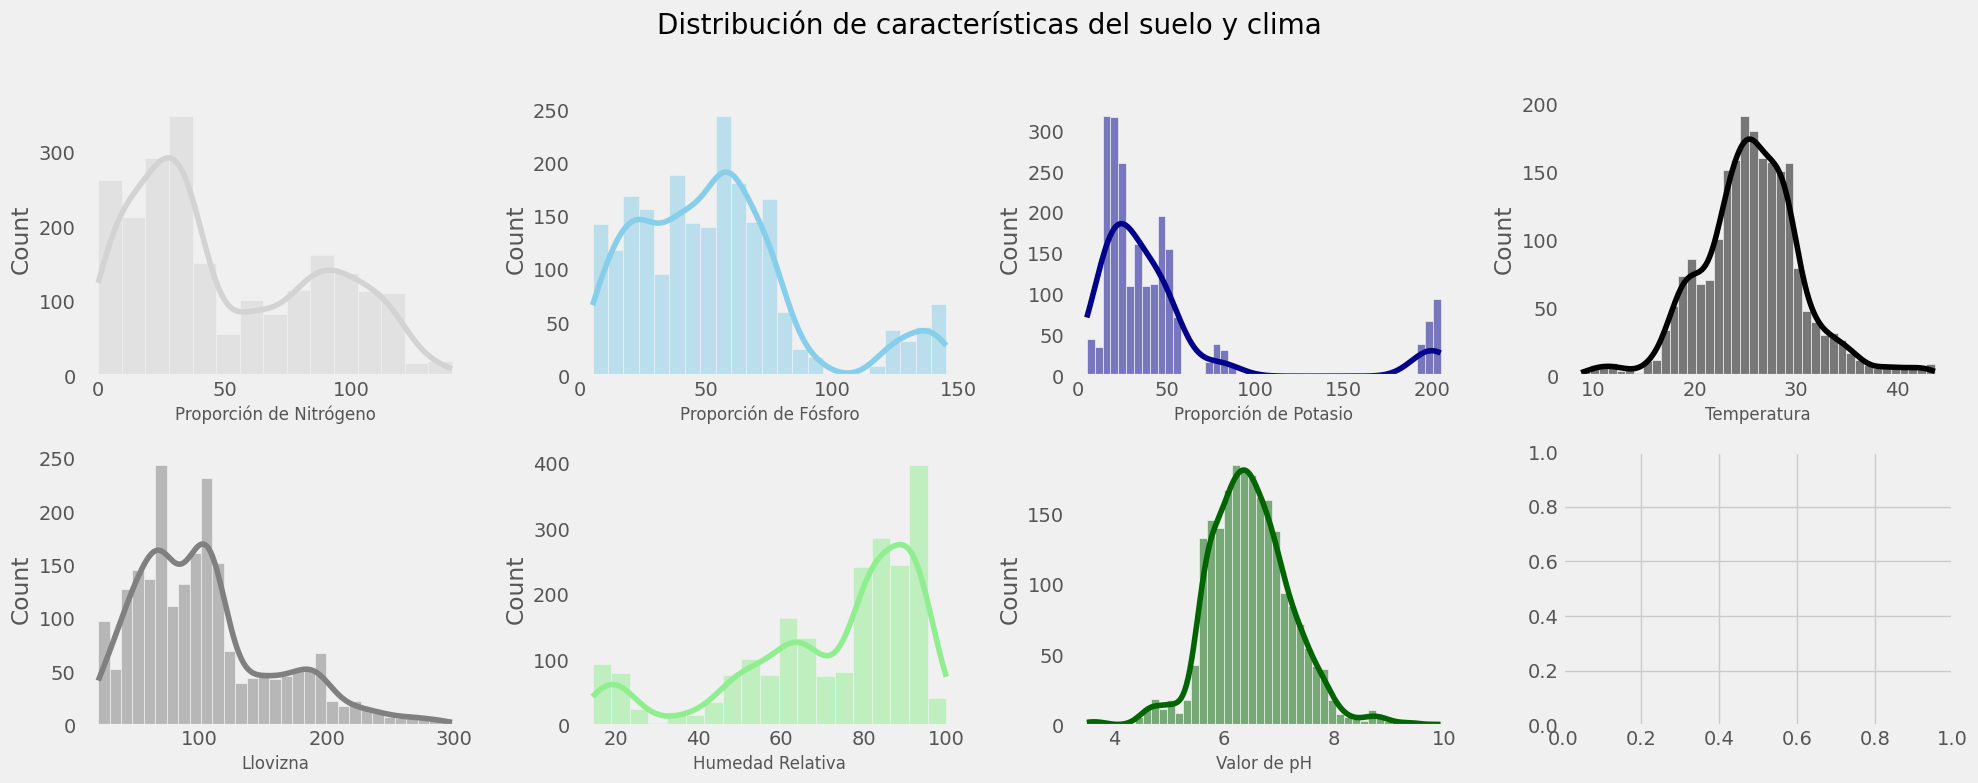

In [95]:
import warnings

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Ajustar el tamaño de la figura
plt.rcParams['figure.figsize'] = (20, 8)  # Ancho máximo

# Crear la figura y los ejes
fig, axes = plt.subplots(2, 4)

# Distribución de N
sns.histplot(data['N'], kde=True, color='lightgrey', ax=axes[0, 0])
axes[0, 0].set_xlabel('Proporción de Nitrógeno', fontsize=12)
axes[0, 0].grid()

# Distribución de P
sns.histplot(data['P'], kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_xlabel('Proporción de Fósforo', fontsize=12)
axes[0, 1].grid()

# Distribución de K
sns.histplot(data['K'], kde=True, color='darkblue', ax=axes[0, 2])
axes[0, 2].set_xlabel('Proporción de Potasio', fontsize=12)
axes[0, 2].grid()

# Distribución de Temperatura
sns.histplot(data['temperature'], kde=True, color='black', ax=axes[0, 3])
axes[0, 3].set_xlabel('Temperatura', fontsize=12)
axes[0, 3].grid()

# Distribución de Lluvia
sns.histplot(data['rainfall'], kde=True, color='grey', ax=axes[1, 0])
axes[1, 0].set_xlabel('Llovizna', fontsize=12)
axes[1, 0].grid()

# Distribución de Humedad
sns.histplot(data['humidity'], kde=True, color='lightgreen', ax=axes[1, 1])
axes[1, 1].set_xlabel('Humedad Relativa', fontsize=12)
axes[1, 1].grid()

# Distribución de pH
sns.histplot(data['ph'], kde=True, color='darkgreen', ax=axes[1, 2])
axes[1, 2].set_xlabel('Valor de pH', fontsize=12)
axes[1, 2].grid()

# Ajustar el título
plt.suptitle('Distribución de características del suelo y clima', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout
plt.show()  # Mostrar las gráficas


In [96]:
# Mostrar algunos patrones interesantes
print("Algunos Patrones Interesantes")
print("---------------------------------")

# Cultivos que requieren un alto contenido de nitrógeno en el suelo
print("Cultivos que requieren una relación muy alta de nitrógeno en el suelo:", 
      data[data['N'] > 120]['label'].unique())

# Cultivos que requieren un alto contenido de fósforo en el suelo
print("Cultivos que requieren una relación muy alta de fósforo en el suelo:", 
      data[data['P'] > 100]['label'].unique())

# Cultivos que requieren un alto contenido de potasio en el suelo
print("Cultivos que requieren una relación muy alta de potasio en el suelo:", 
      data[data['K'] > 200]['label'].unique())

# Cultivos que requieren una alta cantidad de lluvia
print("Cultivos que requieren una alta cantidad de lluvia:", 
      data[data['rainfall'] > 200]['label'].unique())

# Cultivos que requieren una baja temperatura
print("Cultivos que requieren una temperatura muy baja:", 
      data[data['temperature'] < 10]['label'].unique())

# Cultivos que requieren una alta temperatura
print("Cultivos que requieren una temperatura muy alta:", 
      data[data['temperature'] > 40]['label'].unique())

# Cultivos que requieren una baja humedad
print("Cultivos que requieren una baja humedad:", 
      data[data['humidity'] < 20]['label'].unique())

# Cultivos que requieren un pH muy bajo
print("Cultivos que requieren un pH muy bajo:", 
      data[data['ph'] < 4]['label'].unique())

# Cultivos que requieren un pH muy alto
print("Cultivos que requieren un pH muy alto:", 
      data[data['ph'] > 9]['label'].unique())


Algunos Patrones Interesantes
---------------------------------
Cultivos que requieren una relación muy alta de nitrógeno en el suelo: ['cotton']
Cultivos que requieren una relación muy alta de fósforo en el suelo: ['grapes' 'apple']
Cultivos que requieren una relación muy alta de potasio en el suelo: ['grapes' 'apple']
Cultivos que requieren una alta cantidad de lluvia: ['rice' 'papaya' 'coconut']
Cultivos que requieren una temperatura muy baja: ['grapes']
Cultivos que requieren una temperatura muy alta: ['grapes' 'papaya']
Cultivos que requieren una baja humedad: ['chickpea' 'kidneybeans']
Cultivos que requieren un pH muy bajo: ['mothbeans']
Cultivos que requieren un pH muy alto: ['mothbeans']


In [97]:
# Entender qué cultivos solo pueden crecer en la temporada de verano, invierno y lluvias

# Mostrar cultivos que solo se pueden cultivar en verano
print("Cultivos de Verano")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")

# Mostrar cultivos que solo se pueden cultivar en invierno
print("Cultivos de Invierno")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")

# Mostrar cultivos que solo se pueden cultivar en la temporada de lluvias
print("Cultivos de Lluvia")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Cultivos de Verano
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Cultivos de Invierno
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Cultivos de Lluvia
['rice' 'papaya' 'coconut']


### **Agrupación de Cultivos (Clustering)**

En este paso, preparamos los datos para la agrupación (Clustering) de los cultivos en función de varias características del suelo y el clima. Seleccionamos las columnas relevantes que influencian el crecimiento de los cultivos, como el contenido de nitrógeno (N), fósforo (P), potasio (K), temperatura, pH, humedad y lluvia.

In [98]:
# Importar la biblioteca de advertencias para evitar mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

# Seleccionar las columnas de N, P, K, temperatura, pH, humedad y lluvia del conjunto de datos
x = data.loc[:, ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']].values

# Comprobar la forma de la matriz x
print(x.shape)

# Convertir los datos seleccionados en un DataFrame
x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


### **Determinación del Número Óptimo de Clústeres**

En este paso, utilizamos el método del codo para determinar el número óptimo de clústeres en el conjunto de datos. Este método implica calcular la suma de cuadrados dentro de los clústeres (WCSS) para diferentes números de clústeres y visualizar los resultados para identificar un punto donde el WCSS comienza a disminuir a un ritmo más lento.


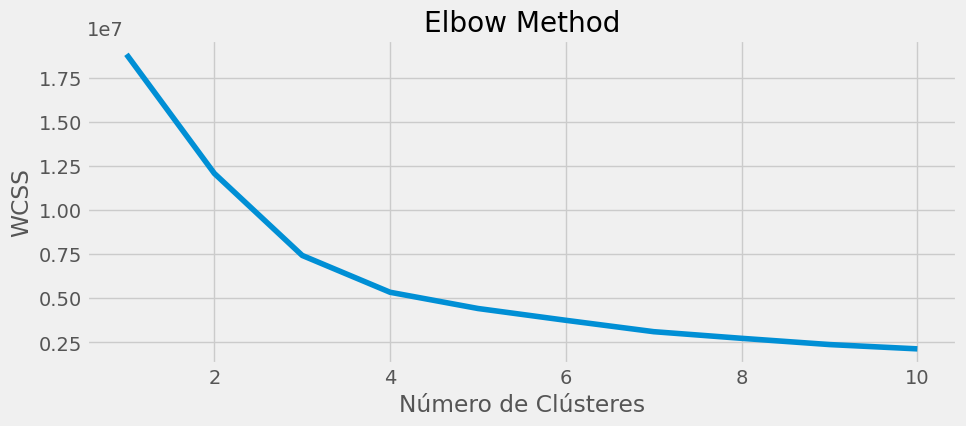

In [99]:
# Importar la clase KMeans de scikit-learn para el agrupamiento
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)  # Ajustar el tamaño de la figura

# Inicializar una lista para almacenar la suma de cuadrados dentro de los grupos (WCSS)
wcss = []

# Determinar el número óptimo de clústeres usando el método del codo
for i in range(1, 11):  # Iterar de 1 a 10 clústeres
    # Crear un modelo KMeans con i clústeres
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)  # Ajustar el modelo a los datos
    wcss.append(km.inertia_)  # Almacenar la WCSS para el clúster actual

# Graficar los resultados
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')  # Establecer el título del gráfico
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()  # Mostrar la gráfica

In [100]:
# Implementar el algoritmo K-Means para realizar el análisis de clústeres
km = KMeans(n_clusters=4, 
             init='k-means++',  # Inicialización inteligente de los centroides
             max_iter=300,  # Número máximo de iteraciones 
             n_init=10,  # Número de veces que se ejecutará el algoritmo con diferentes centroides 
             random_state=0)  # Semilla aleatoria para reproducibilidad

# Predecir los clústeres para los datos
y_means = km.fit_predict(x)

# Obtener los resultados
a = data['label']  # Etiquetas originales de los cultivos
y_means = pd.DataFrame(y_means)  # Convertir predicciones a DataFrame
z = pd.concat([y_means, a], axis=1)  # Concatenar predicciones y etiquetas
z = z.rename(columns={0: 'cluster'})  # Renombrar columna del clúster

# Verificar los clústeres de cada cultivo
print("Resultados después de aplicar el análisis de clústeres K-Means:\n")
print("Cultivos en el Primer Clúster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Segundo Clúster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Tercer Clúster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Cuarto Clúster:", z[z['cluster'] == 3]['label'].unique())

Resultados después de aplicar el análisis de clústeres K-Means:

Cultivos en el Primer Clúster: ['grapes' 'apple']
---------------------------------------------------------------
Cultivos en el Segundo Clúster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Cultivos en el Tercer Clúster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Cultivos en el Cuarto Clúster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


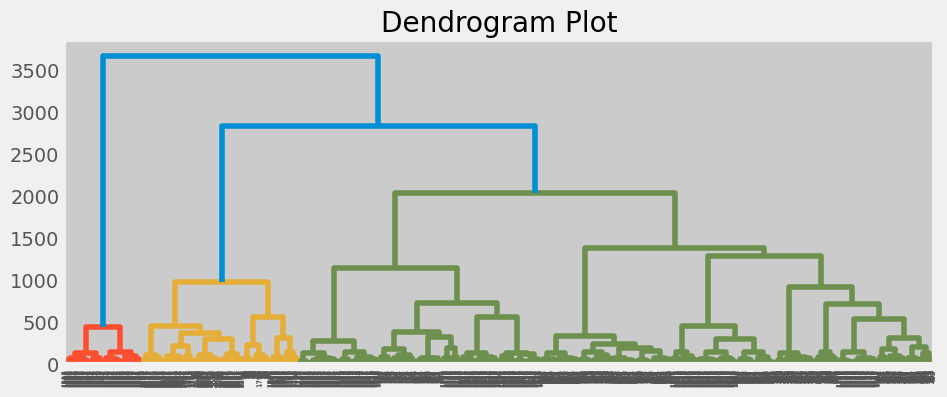

In [101]:
# Importar la biblioteca necesaria para el clustering jerárquico
import scipy.cluster.hierarchy as shc  

# Crear un dendrograma para visualizar las relaciones jerárquicas entre los puntos de datos
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  

# Título del gráfico
plt.title("Dendrogram Plot")  
plt.show()  # Mostrar el gráfico


### **Agglomerative Clustering**

Este es un tipo de algoritmo de clustering jerárquico. Comienza con cada punto de datos como su propio clúster y luego itera combinando los clústeres más cercanos en función de la distancia entre ellos. En este caso, se está utilizando el método de enlace "ward", que minimiza la varianza dentro de los clústeres cuando los puntos se combinan.

In [102]:
# Importar el modelo de clustering jerárquico
from sklearn.cluster import AgglomerativeClustering  

# Entrenar el modelo jerárquico en el conjunto de datos
# n_clusters: número de clústeres que deseamos formar (4 en este caso)
# linkage='ward': método de enlace que minimiza la varianza total dentro de cada clúster
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')  

# Predecir las etiquetas de clúster para los datos
y_her = hc.fit_predict(x)  

# Obtener las etiquetas de los cultivos
b = data['label']

# Convertir los resultados de clustering a DataFrame
y_herr = pd.DataFrame(y_her)

# Concatenar las etiquetas de clustering con los nombres de los cultivos
w = pd.concat([y_herr, b], axis=1)

# Renombrar la columna del clúster para mayor claridad
w = w.rename(columns={0: 'cluster'})

# Mostrar los cultivos pertenecientes a cada clúster
print("Análisis de Clustering Jerárquico \n")
print("Cultivos en el Clúster 0:", w[w['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Clúster 1:", w[w['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Clúster 2:", w[w['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Cultivos en el Clúster 3:", w[w['cluster'] == 3]['label'].unique())


Análisis de Clustering Jerárquico 

Cultivos en el Clúster 0: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'orange' 'coconut']
---------------------------------------------------------------
Cultivos en el Clúster 1: ['maize' 'blackgram' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton']
---------------------------------------------------------------
Cultivos en el Clúster 2: ['rice' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Cultivos en el Clúster 3: ['grapes' 'apple']


### **Visualización de Clústeres de Cultivos**
#### Colaboración por: Rodrigo Barba
Los cultivos se agrupan en 4 clústeres y se presentan gráficamente en un diagrama de dispersión (scatter plot), utilizando diferentes colores para identificar cada clúster.

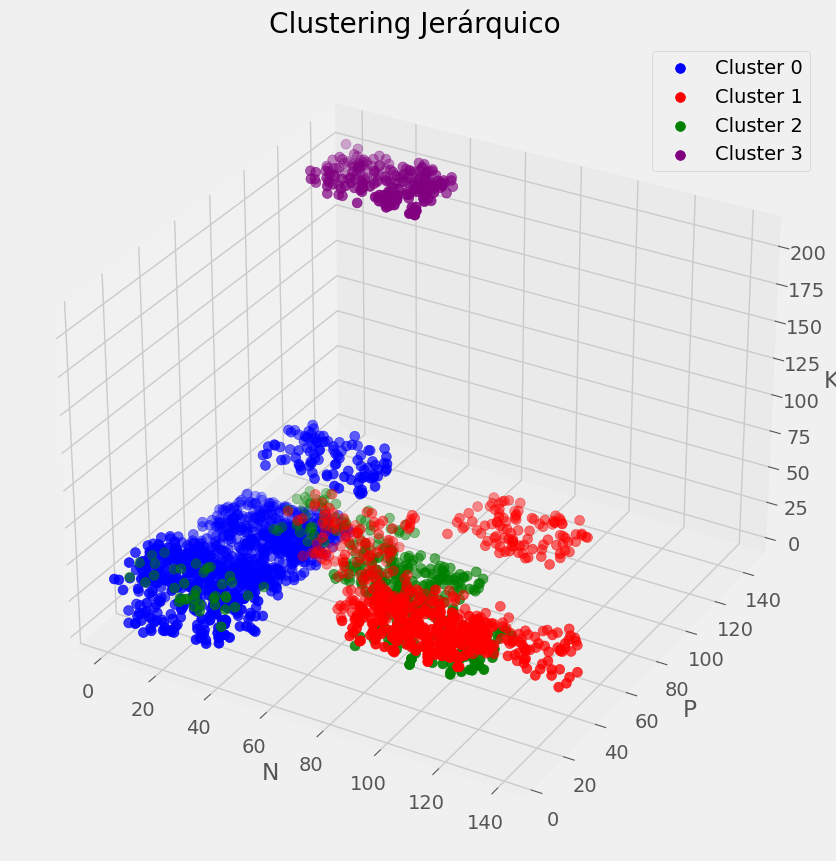

In [103]:
# Visualización de los clústeres con acceso correcto a los índices

# Importar la biblioteca necesaria para la visualización
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Añadir un subplot

# Asignar colores a los clústeres
colors = ['blue', 'red', 'green', 'purple']

# Iterar sobre los clústeres y asignar colores
for i in range(0, 4):
    ax.scatter(x[y_her == i, 0], x[y_her == i, 1], x[y_her == i, 2], s=50, c=colors[i], label='Cluster ' + str(i))

# Añadir etiquetas a los ejes
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')

# Añadir una leyenda
plt.legend()

# Añadir un título
plt.title('Clustering Jerárquico')

# Mostrar el gráfico
plt.show()


In [105]:
# Hard Clustering

# Imprimir encabezado para la salida
print("Resultados para Hard Clustering\n")

# Procesar los cultivos para el primer clúster
counts = z[z['cluster'] == 0]['label'].value_counts()  # Contar las etiquetas en el clúster 0
d = z.loc[z['label'].isin(counts.index[counts >= 50])]  # Filtrar cultivos con al menos 50 muestras
d = d['label'].value_counts()  # Contar cuántos cultivos hay
print("Cultivos en el Clúster 1:", list(d.index))  # Imprimir los cultivos en el clúster 1
print("--------------------------------------------------")

# Procesar los cultivos para el segundo clúster
counts = z[z['cluster'] == 1]['label'].value_counts()  # Contar las etiquetas en el clúster 1
d = z.loc[z['label'].isin(counts.index[counts >= 50])]  # Filtrar cultivos con al menos 50 muestras
d = d['label'].value_counts()  # Contar cuántos cultivos hay
print("Cultivos en el Clúster 2:", list(d.index))  # Imprimir los cultivos en el clúster 2
print("--------------------------------------------------")

# Procesar los cultivos para el tercer clúster
counts = z[z['cluster'] == 2]['label'].value_counts()  # Contar las etiquetas en el clúster 2
d = z.loc[z['label'].isin(counts.index[counts >= 50])]  # Filtrar cultivos con al menos 50 muestras
d = d['label'].value_counts()  # Contar cuántos cultivos hay
print("Cultivos en el Clúster 3:", list(d.index))  # Imprimir los cultivos en el clúster 3
print("--------------------------------------------------")

# Procesar los cultivos para el cuarto clúster
counts = z[z['cluster'] == 3]['label'].value_counts()  # Contar las etiquetas en el clúster 3
d = z.loc[z['label'].isin(counts.index[counts >= 50])]  # Filtrar cultivos con al menos 50 muestras
d = d['label'].value_counts()  # Contar cuántos cultivos hay
print("Cultivos en el Clúster 4:", list(d.index))  # Imprimir los cultivos en el clúster 4

# Visualización de los clústeres con acceso correcto a los índices con base al hard clustering


Resultados para Hard Clustering

Cultivos en el Clúster 1: ['grapes', 'apple']
--------------------------------------------------
Cultivos en el Clúster 2: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Cultivos en el Clúster 3: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Cultivos en el Clúster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


### Modelado Predictivo de Cultivos

In [107]:
# Separar el conjunto de datos para el modelado predictivo

# Asignar la etiqueta de los cultivos a la variable y
y = data['label']  

# Eliminar la columna de etiquetas y asignar el resto de los datos a la variable x
x = data.drop(['label'], axis=1)  

# Imprimir las dimensiones del conjunto de características (x) y etiquetas (y)
print("Dimensión de x:", x.shape)  
print("Dimensión de y:", y.shape)  


Shape of x: (2200, 7)
Shape of y: (2200,)


In [109]:
# Importar la función train_test_split para crear conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# 80% para entrenamiento y 20% para prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)  

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("The Shape of x train:", x_train.shape)  
print("The Shape of x test:", x_test.shape)  
print("The Shape of y train:", y_train.shape)  
print("The Shape of y test:", y_test.shape)  


The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para plotear

def evaluator(y_test, y_pred):
    """
    Función para evaluar el rendimiento del modelo.
    
    Args:
        y_test (array-like): Valores reales de la variable objetivo.
        y_pred (array-like): Valores predichos por el modelo.

    """
    # Cálculo de la exactitud:
    print('La exactitud es: ', accuracy_score(y_test, y_pred))
    print('')

    # Informe de clasificación:
    print('Informe de Clasificación: \n', classification_report(y_test, y_pred))

    print('Matriz de Confusión: \n\n')
    plt.style.use("ggplot")  # Estilo de la gráfica
    cm = confusion_matrix(y_test, y_pred)  # Cálculo de la matriz de confusión
    plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), show_normed=True)  # Graficar matriz de confusión
    plt.title('Matriz de Confusión para la Regresión Logística', fontsize=15)  # Título de la gráfica
    plt.show()  # Mostrar la gráfica


In [112]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas
label_encoder = LabelEncoder()  # Inicializar el codificador
y_train_encoded = label_encoder.fit_transform(y_train)  # Codificar etiquetas de entrenamiento
y_test_encoded = label_encoder.transform(y_test)  # Codificar etiquetas de prueba

# Crear modelos predictivos
model_accuracy = []  # Lista para almacenar la precisión de los modelos
models = {
    "KNN": KNeighborsClassifier(),              # Modelo KNN
    "DT": DecisionTreeClassifier(),             # Modelo de Árbol de Decisión
    'RFC': RandomForestClassifier(),            # Modelo de Bosque Aleatorio
    'GBC': GradientBoostingClassifier(),        # Modelo de Gradiente Acelerado
    'XGB': XGBClassifier()                       # Modelo XGBoost
}

# Entrenamiento y evaluación de cada modelo
for test, clf in models.items():
    clf.fit(x_train, y_train_encoded)  # Ajustar el modelo a los datos de entrenamiento
    y_pred = clf.predict(x_test)  # Hacer predicciones sobre el conjunto de prueba
    acc = accuracy_score(y_test_encoded, y_pred)  # Calcular la precisión
    train_pred = clf.predict(x_train)  # Hacer predicciones sobre el conjunto de entrenamiento
    train_acc = accuracy_score(y_train_encoded, train_pred)  # Calcular la precisión del entrenamiento
    
    # Imprimir resultados
    print("\n", test + ' puntuaciones')  # Mensaje del modelo
    print('Precisión en prueba:', acc)  # Precisión en el conjunto de prueba
    print('Informe de Clasificación: \n', classification_report(y_test_encoded, y_pred))  # Informe de clasificación
    print('Matriz de Confusión: \n', confusion_matrix(y_test_encoded, y_pred))  # Mostrar matriz de confusión
    print('*' * 100, "\n")  # Separador
    model_accuracy.append({'Modelo': test, 'Precisión': acc, 'Train_acc': train_acc})  # Guardar resultados

# Crear un DataFrame con las precisiones de los modelos
model_accuracy_df = pd.DataFrame(model_accuracy)  # Convertir la lista de resultados en un DataFrame



 KNN puntuaciones
Precisión en prueba: 0.9772727272727273
Informe de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        18
           8       0.79      0.90      0.84        21
           9       0.91      1.00      0.95        20
          10       1.00      1.00      1.00        17
          11       0.95      1.00      0.97        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00     

In [115]:
# Ordenar la lista de precisiones de modelos en orden descendente para identificar el mejor modelo
model_accuracy.sort(key=lambda x: x['Precisión'], reverse=True)

La exactitud es:  0.9772727272727273

Informe de Clasificación: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.90      0.84        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange   

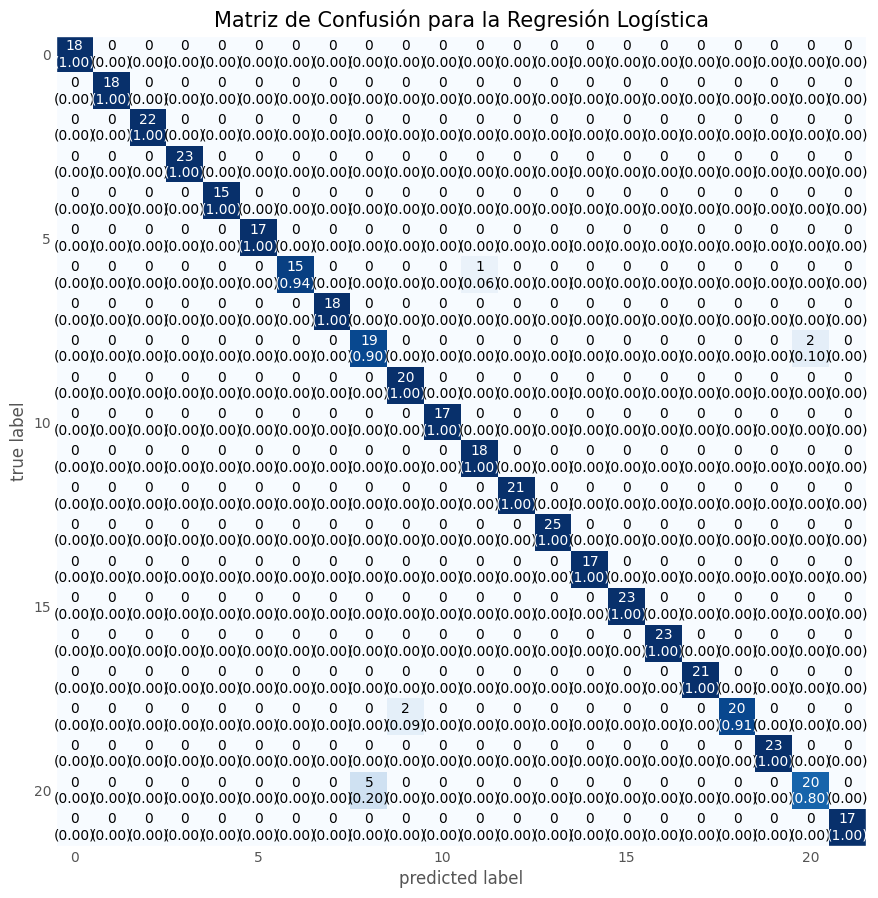

In [117]:
# Realizar importación de librería de KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear instancia del modelo de clasificación
kn_classifier = KNeighborsClassifier()

# Ajustar modelo con el conjunto de datos de entrenamiento
kn_classifier.fit(x_train, y_train)

# Hacer predicciones utilizando el clasificador KNN
pred_kn = kn_classifier.predict(x_test)  # Predecir las etiquetas para el conjunto de prueba

# Evaluar el rendimiento del clasificador KNN
evaluator(y_test, pred_kn)  # Llamar a la función evaluadora con las etiquetas reales y las predicciones

### **Predicciones en Tiempo Real**

In [118]:
# Mostrar las primeras filas del conjunto de datos
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [119]:
# Hacer una predicción usando el clasificador KNN para condiciones climáticas específicas
prediction = kn_classifier.predict(np.array([[90,
                                              40,
                                              40,
                                              20,
                                              80,
                                              7, 
                                              200]])) 

# Imprimir la sugerencia del cultivo basado en las condiciones climáticas dadas
print("El cultivo sugerido para las condiciones climáticas dadas es:", prediction)


El cultivo sugerido para las condiciones climáticas dadas es: ['jute']
